# Exploratory Data Analysis

## Before we start

The data we are dealing with is a data from telegram chat. This notebook is needed to understand, what kind of data our model will be dealing with and how to transform it into a form that can be used by the model.

## Data cleaning

In [1]:
import pandas as pd

In [2]:
df = pd.read_json("../data/messages.json")

In [3]:
df.columns

Index(['_', 'id', 'from_user', 'date', 'chat', 'reply_to_message_id',
       'mentioned', 'scheduled', 'from_scheduled', 'has_protected_content',
       'text', 'outgoing', 'edit_date', 'reactions', 'reply_to_top_message_id',
       'entities', 'media', 'has_media_spoiler', 'photo', 'via_bot', 'caption',
       'sticker', 'forward_from_chat', 'forward_from_message_id',
       'forward_signature', 'forward_date', 'animation', 'views', 'forwards',
       'web_page', 'reply_markup', 'document', 'forward_from', 'service',
       'new_chat_members', 'pinned_message', 'caption_entities',
       'forward_sender_name', 'video', 'poll', 'voice', 'video_note',
       'media_group_id', 'audio'],
      dtype='object')

We can clearly see, that the are a lot of redundant information, so we are going to drop it, saving only `text` and column.

In [4]:
df = df[["text"]]
df.head()

,text
0,аха
1,да
2,В IR в задании с NDCG нужно обычное среднее по...
3,весь иннополис ушел во мрак
4,и чет приложение Яндекс маркета тупит…


Quick check for `NaN` values

In [5]:
df["text"].isna().sum()

521

There are some, let's drop them

In [6]:
df = df.dropna()

Now, let's quickly look at the data using `value_counts()` method.

In [7]:
df.value_counts()

text                             
/herman_s_dr                         671
/snejugal_s_dr                       227
/karinochka_s_dr                     219
/Elina_s_dr                          161
/ernest_s_dr                         143
                                    ... 
Логики нет, как обычно                 1
Ловко они это придумали                1
Лишь бы теперь не пройти в тиньку      1
Лишний балл нужен                      1
🫡                                      1
Name: count, Length: 5905, dtype: int64

In the chat we exported, there is a common *problem* with spamming *bot commands* on birthdays. This is a good insight on the data, since it is pointless to summarize bot commands, since they are not a part of the conversation.

But for further analysis, we will need to remove them.

In [8]:
df = df[~df["text"].str.startswith("/")]
df.head()

,text
0,аха
1,да
2,В IR в задании с NDCG нужно обычное среднее по...
3,весь иннополис ушел во мрак
4,и чет приложение Яндекс маркета тупит…


## Data analysis

Now, let's look at the data in a more detailed way.

<Axes: >

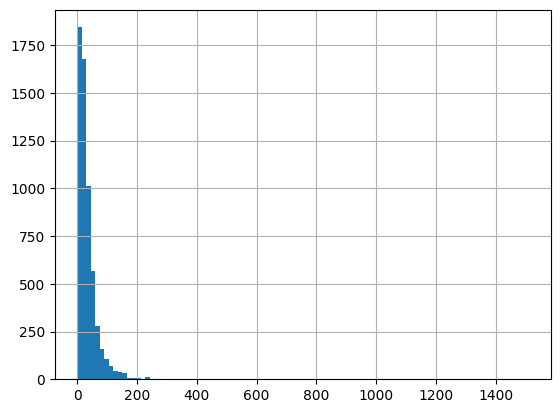

In [9]:
df["text"].str.len().hist(bins=100)

Most of the dataset has small length of messages, but there are some outliers, that we will need to deal with. I think, the best way to handle it before feeding it to model is to truncate the messages to some reasonable length, for example, `250` symbols.

In [10]:
df = df[df["text"].str.len() < 250]

<Axes: >

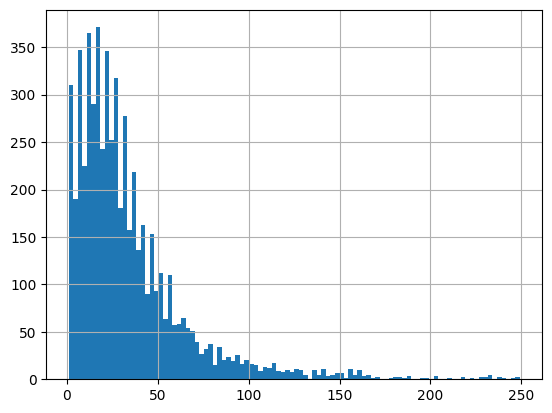

In [11]:
df["text"].str.len().hist(bins=100)

The same applies for messages with length of `3-4` symbols, since they are most likely to not be a part of the conversation.

In [12]:
df = df[df["text"].str.len() > 4]

Just a funny way to visualize the data is to create a wordcloud.

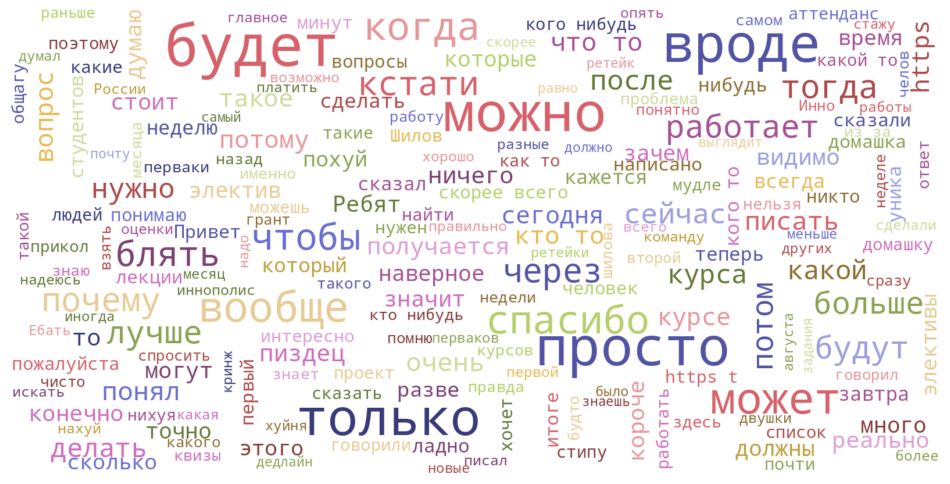

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(
    [
        " ".join(list(filter(lambda x: len(x) > 4, sentence)))
        for sentence in df["text"].str.split().to_list()
    ]
)
wordcloud = WordCloud(
    width=1600,
    height=800,
    max_font_size=100,
    max_words=200,
    colormap="tab20b",
    background_color="white",
    random_state=42,
).generate(text)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()